In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
user_info= pd.read_csv('u.data', sep='\t', 
                 names=['user_id','movie_id','rating','timestamp'])

In [3]:
user_info.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movie_info = pd.read_csv('u.item', sep='|',
                         names = ['movie_id', 
                         'movie_title', 'release_date', 
                         'video_release_date','imdb_url','unknown', 
                         'action','adventure','animation', 'children',
                         'comedy', 'crime', 'documentary','drama',
                         'fantasy','film_noir', 'horror', 'musical',
                         'mystery','romance', 'sci_fi', 'thriller',
                         'war','western'], encoding='latin-1')

In [5]:
movie_info.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
user_demo_info = pd.read_csv('u.user', sep='|', 
                 names=['user_id','age','gender','occupation',
                        'zipcode'])

In [7]:
user_demo_info.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Drop timestamp and unknown column( empty)

Please note that the data dictionary was innaccurate, files are delimitted by pipe and are not tab seperated



In [8]:
user = pd.merge(user_demo_info, user_info, on='user_id')
df = pd.merge(user, movie_info, on='movie_id')
pd.set_option('display.max_columns', 500)
df.describe()

,user_id,age,movie_id,rating,timestamp,video_release_date,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,0.0,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08,NaN,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,0.007580,0.398950,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06,NaN,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,0.086733,0.489685,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08,NaN,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08,NaN,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [9]:
df

,user_id,age,gender,occupation,zipcode,movie_id,rating,timestamp,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,17,M,student,60089,1679,3,889289491,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
99996,863,17,M,student,60089,1678,1,889289570,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99997,863,17,M,student,60089,1680,2,889289570,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
99998,896,28,M,writer,91505,1681,3,887160722,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df = df.drop(columns='timestamp')

In [11]:
df = df.drop(columns=['video_release_date', 'imdb_url'])

In [12]:
df = df.drop(columns='release_date')

In [13]:
df.describe()

,user_id,age,movie_id,rating,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,32.969850,425.530130,3.529860,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,0.007580,0.398950,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,11.562623,330.798356,1.125674,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,0.086733,0.489685,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,7.000000,1.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,24.000000,175.000000,3.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,30.000000,322.000000,4.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,40.000000,631.000000,4.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,73.000000,1682.000000,5.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [14]:
df.head(2)

,user_id,age,gender,occupation,zipcode,movie_id,rating,movie_title,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,24,M,technician,85711,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
occupation = pd.DataFrame(df.groupby(['movie_title'])['rating'].mean())
occupation.head(10)

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [16]:
occupation['number_of_ratings'] = pd.DataFrame(df.groupby(['movie_title'])['rating'].count())


occupation['number_of_ratings'] .head(20)


movie_title
'Til There Was You (1997)                        9
1-900 (1994)                                     5
101 Dalmatians (1996)                          109
12 Angry Men (1957)                            125
187 (1997)                                      41
2 Days in the Valley (1996)                     93
20,000 Leagues Under the Sea (1954)             72
2001: A Space Odyssey (1968)                   259
3 Ninjas: High Noon At Mega Mountain (1998)      5
39 Steps, The (1935)                            59
8 1/2 (1963)                                    38
8 Heads in a Duffel Bag (1997)                   4
8 Seconds (1994)                                 4
A Chef in Love (1996)                            8
Above the Rim (1994)                             5
Absolute Power (1997)                          127
Abyss, The (1989)                              151
Ace Ventura: Pet Detective (1994)              103
Ace Ventura: When Nature Calls (1995)           37
Across the Sea of T

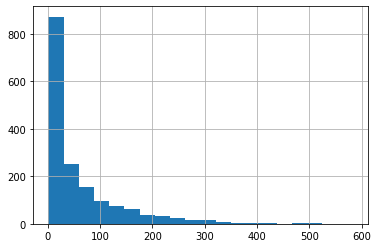

In [17]:
occupation['number_of_ratings'].hist(bins=20)

#most movies have 0 ratings by an accupation, but there is an increase after 10 ratings.

In [18]:
df = pd.concat([df,pd.get_dummies(df['occupation'], prefix='occupation')],axis=1)
# change to dummy variables hotoneencoded columns for occupation

In [19]:
df.head(2)

,user_id,age,gender,occupation,zipcode,movie_id,rating,movie_title,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,occupation_homemaker,occupation_lawyer,occupation_librarian,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,M,technician,85711,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,13,47,M,educator,29206,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df.drop(['occupation'],axis=1, inplace=True) #dropped original occupation column

In [21]:
df.head(2)

,user_id,age,gender,zipcode,movie_id,rating,movie_title,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,occupation_homemaker,occupation_lawyer,occupation_librarian,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,M,85711,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,13,47,M,29206,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df = pd.concat([df,pd.get_dummies(df['gender'], prefix='gender')],axis=1)

In [23]:
df.head(2)

,user_id,age,gender,zipcode,movie_id,rating,movie_title,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,occupation_homemaker,occupation_lawyer,occupation_librarian,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer,gender_F,gender_M
0,1,24,M,85711,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,13,47,M,29206,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
df.drop(['gender'],axis=1, inplace=True) #dropped original gender column

In [25]:
df.head(2)

,user_id,age,zipcode,movie_id,rating,movie_title,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,occupation_homemaker,occupation_lawyer,occupation_librarian,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer,gender_F,gender_M
0,1,24,85711,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,13,47,29206,61,4,Three Colors: White (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Next let’s look at the most rated movies and choose two of them to work with in this simple recommender system. We use pandas sort_values utility and set ascending to false in order to arrange the movies from the most rated. We then use the head() function to view the top 10.

In [26]:
occupation.sort_values('rating', ascending=False).head(10)

,rating,number_of_ratings
movie_title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


In [27]:
# NEED TO APPLY TO THIS MATRIX
# do for educator, healthcare and administrator

OC_movie_matrix = df[df['occupation_student'] == True].pivot_table(index='user_id', columns='movie_title', values='rating')
OC_movie_matrix.head()

movie_title,'Til There Was You (1997),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),Alice in Wonderland (1951),Alien (1979),Alien 3 (1992),Alien: Resurrection (1997),Aliens (1986),All About Eve (1950),All Dogs Go to Heaven 2 (1996),Alphaville (1965),Amadeus (1984),Amateur (1994),"Amazing Panda Adventure, The (1995)",American Buffalo (1996),"American President, The (1995)","American Werewolf in London, An (1981)","American in Paris, An (1951)",Amistad (1997),"Amityville Horror, The (1979)",Amityville II: The Possession (1982),Amos & Andrew (1993),An Unforgettable Summer (1994),Anaconda (1997),Anastasia (1997),Andre (1994),Angels and Insects (1995),Angels in the Outfield (1994),Angus (1995),Anna Karenina (1997),Anne Frank Remembered (1995),Annie Hall (1977),Another Stakeout (1993),Antonia's Line (1995),Aparajito (1956),"Apartment, The (1960)",Apocalypse Now (1979),Apollo 13 (1995),"Apostle, The (1997)","Apple Dumpling Gang, The (1975)",April Fool's Day (1986),Apt Pupil (1998),"Aristocats, The (1970)",Army of Darkness (1993),Around the World in 80 Days (1956),"Arrival, The (1996)",Arsenic and Old Lace (1944),As Good As It Gets (1997),Assassins (1995),"Assignment, The (1997)","Associate, The (1996)",Audrey Rose (1977),Austin Powers: International Man of Mystery (1997),"Awfully Big Adventure, An (1995)",Ayn Rand: A Sense of Life (1997),B*A*P*S (1997),B. Monkey (1998),Babe (1995),"Baby-Sitters Club, The (1995)","Babysitter, The (1995)",Back to the Future (1985),Backbeat (1993),Bad Boys (1995),Bad Company (1995),Bad Girls (1994),Bad Moon (1996),Bad Taste (1987),Balto (1995),Bananas (1971),"Band Wagon, The (1953)",Barb Wire (1996),Barbarella (1968),Barcelona (1994),Basic Instinct (1992),"Basketball Diaries, The (1995)",Basquiat (1996),Batman & Robin (1997),Batman (1989),Batman Forever (1995),Batman Returns (1992),Bean (1997),"Beautician and the Beast, The (1997)",Beautiful Girls (1996),Beautiful Thing (1996),Beauty and the Beast (1991),Beavis and Butt-head Do America (1996),Bed of Roses (1996),Bedknobs and Broomsticks (1971),Before Sunrise (1995),Before and After (1996),Before the Rain (Pred dozhdot) (1994),Being Human (1993),Being There (1979),"Believers, The (1987)",Belle de jour (1967),Ben-Hur (1959),Benny & Joon (1993),Bent (1997),Best of the Best 3: No Turning Back (1995),Better Off Dead... (1985),"Beverly Hillbillies, The (1993)",Beverly Hills Cop III (1994),Beverly Hills Ninja (1997),"Bewegte Mann, Der (1994)",Beyond Rangoon (1995),Bhaji on the Beach (1993),"Big Blue, The (Grand bleu, Le) (1988)",Big Bully (1996),"Big Green, The (1995)","Big Lebowski, The (1998)",Big Night (1996),"Big Sleep, The (1946)",Billy Madison (1995),Bio-Dome (1996),"Birdcage, The (1996)","Birds, The (1963)",Black Sheep (1996),Blade Runner (1982),Blink (1994),"Blob, The (1958)",Blood & Wine (1997),Blown Away (1994),"Blue Angel, The (Blaue Engel, Der) (1930)",Blue Chips (1994),Blue Sky (1994),Blue in the Face (1995),Blues Brothers 2000 (1998),"Blues Brothers, The (1980)",Bob Roberts (1992),Body Parts (1991),"Body Snatcher, The (1945)",Body Snatchers (1993),Bogus (1996),"Bon

In [28]:
star_wars_OC_rating = OC_movie_matrix['Star Wars (1977)']

In [29]:
similar_to_star_wars = OC_movie_matrix.corrwith(star_wars_OC_rating)
similar_to_star_wars.head()

movie_title
'Til There Was You (1997)           NaN
101 Dalmatians (1996)          0.146301
12 Angry Men (1957)            0.363252
187 (1997)                    -0.612372
2 Days in the Valley (1996)    0.118084
dtype: float64

In [30]:
similar_to_star_wars.sort_values(ascending=False).head(10)

movie_title
Howling, The (1981)                             1.0
Before and After (1996)                         1.0
Cronos (1992)                                   1.0
Amos & Andrew (1993)                            1.0
Fog, The (1980)                                 1.0
Stripes (1981)                                  1.0
Paths of Glory (1957)                           1.0
Man of No Importance, A (1994)                  1.0
Halloween: The Curse of Michael Myers (1995)    1.0
Jingle All the Way (1996)                       1.0
dtype: float64

We realize from the computation that there is a very strong correlation (of 0.904) between Sta Wars and Weekend at Bernies.

As noticed earlier our matrix had very many missing values since not all the movies were rated by all the users. We therefore drop those null values and transform correlation results into dataframes to make the results look more appealing.

In [31]:
corr_occ_star_wars = pd.DataFrame(similar_to_star_wars, columns=['Correlation'])
corr_occ_star_wars.dropna(inplace=True)
corr_occ_star_wars.head()

,Correlation
movie_title,
101 Dalmatians (1996),0.146301
12 Angry Men (1957),0.363252
187 (1997),-0.612372
2 Days in the Valley (1996),0.118084
"20,000 Leagues Under the Sea (1954)",0.111035


These  dataframe above show us the movies that are most similar to Star Wars. However we have a challenge in that some of the movies have very few ratings and may end up being recommended simply because one or two people gave them a 5 star rating. We can fix this by setting a threshold for the number of ratings. From the histogram earlier. In order to do this we need to join the dataframe with the number_of_ratings column in the ratings dataframe.

In [32]:
corr_star_wars_occupation = pd.merge(corr_occ_star_wars, occupation, on='movie_title')

corr_star_wars_occupation.head()

,Correlation,rating,number_of_ratings
movie_title,,,
101 Dalmatians (1996),0.146301,2.908257,109
12 Angry Men (1957),0.363252,4.344000,125
187 (1997),-0.612372,3.024390,41
2 Days in the Valley (1996),0.118084,3.225806,93
"20,000 Leagues Under the Sea (1954)",0.111035,3.500000,72


We shall now obtain the movies that are most similar to Star Wars by limiting them to movies that have at least 10 reviews. We then sort them by the correlation column and view the first 10.

In [33]:
corr_star_wars_occupation[corr_star_wars_occupation['number_of_ratings'] > 10].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,rating,number_of_ratings
movie_title,,,
"Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)",1.0,3.772727,44
Paths of Glory (1957),1.0,4.212121,33
Halloween: The Curse of Michael Myers (1995),1.0,2.200000,25
Before and After (1996),1.0,2.846154,26
Tin Men (1987),1.0,3.078431,51
"Howling, The (1981)",1.0,3.026316,38
Jingle All the Way (1996),1.0,2.111111,18
"Women, The (1939)",1.0,3.666667,15
Amos & Andrew (1993),1.0,2.684211,19


In [34]:
OC_movie_matrix.shape

# lack of data correlation ould probably not provide very similar recommendations

(196, 1328)

In [35]:
corr_star_wars_occupation[corr_star_wars_occupation['number_of_ratings'] > 10].sort_values(by='Correlation', ascending=False).head(10)

# same correlation numbers as matrix with just movie_id and ratings
# how can I display column wih occupation type 

,Correlation,rating,number_of_ratings
movie_title,,,
"Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)",1.0,3.772727,44
Paths of Glory (1957),1.0,4.212121,33
Halloween: The Curse of Michael Myers (1995),1.0,2.200000,25
Before and After (1996),1.0,2.846154,26
Tin Men (1987),1.0,3.078431,51
"Howling, The (1981)",1.0,3.026316,38
Jingle All the Way (1996),1.0,2.111111,18
"Women, The (1939)",1.0,3.666667,15
Amos & Andrew (1993),1.0,2.684211,19
